In [6]:
import pandas as pd

import seaborn as sns

sns.set_style('whitegrid')

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
vgames_df = pd.read_excel('vgsales_excl.xlsx')

vgames_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [8]:
vgames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Cleanup:
- The year column is a floting number instead of integer
- The year and publisher columns have some missing values
- Noticed some miscalculations in the global sales column

In [9]:
# Dropping all the rows that have null values 
vgames_df.dropna(axis=0, how='any', inplace=True)

# Casting the Year column to an integer
vgames_df['Year'] = vgames_df['Year'].astype(dtype=int)

vgames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
# Checking how many miscalculations the global sales column has
vgames_df[vgames_df['Global_Sales'] != 
          vgames_df['NA_Sales'] + vgames_df['EU_Sales'] + vgames_df['JP_Sales'] + vgames_df['Other_Sales']].shape[0]

6647

In [11]:
# Recalculating the global sales
def glob_sales_col(columns):
    
    na, eu, jp, oth = columns   
    
    return na + eu + jp + oth

vgames_df['Global_Sales'] = vgames_df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].apply(glob_sales_col, axis=1)

In [12]:
# Checking if there are any miscalculations now
vgames_df[vgames_df['Global_Sales'] != 
          vgames_df['NA_Sales'] + vgames_df['EU_Sales'] + vgames_df['JP_Sales'] + vgames_df['Other_Sales']].shape[0]

0

In [13]:
# Making a console manufacturer column (focusing on the big 3)
vgames_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', 2600, 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
sony_plats = ['PS','PS2','PS3','PS4','PSP','PSV']

ms_plats = ['XB','X360','XOne']

nintendo_plats = ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']

def plat_manufac(plat):
    
    if plat in sony_plats:
        return 'Sony'
    
    elif plat in ms_plats:
        return 'Microsoft'
    
    elif plat in nintendo_plats:
        return 'Nintendo'    
    
    else:
        return 'Other'

In [15]:
vgames_df['Platform_Manufacturer'] = vgames_df['Platform'].apply(plat_manufac)

vgames_df['Platform_Manufacturer'].value_counts()

Sony         6563
Nintendo     6141
Microsoft    2250
Other        1337
Name: Platform_Manufacturer, dtype: int64

In [16]:
# There's little to no data in 2017 & 2020 so i'll remove it for the visualization
vgames_df[vgames_df['Year'] > 2016].shape[0]

4

In [17]:
vgames_df.drop(vgames_df[vgames_df['Year'] == 2017].index, inplace=True)

vgames_df.drop(vgames_df[vgames_df['Year'] == 2020].index, inplace=True)

vgames_df.sort_values(by='Year', ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Manufacturer
16431,16434,Kamigami no Asobi InFinite,PSV,2016,Adventure,Broccoli,0.00,0.00,0.01,0.00,0.01,Sony
1026,1028,Overwatch,PS4,2016,Shooter,Activision,0.64,0.68,0.14,0.26,1.72,Sony
16051,16054,Battle Worlds: Kronos,PC,2016,Strategy,Nordic Games,0.00,0.01,0.00,0.00,0.01,Other
11167,11169,Lego Star Wars: The Force Awakens,WiiU,2016,Action,Warner Bros. Interactive Entertainment,0.04,0.04,0.00,0.01,0.09,Nintendo
14847,14850,Terraria,WiiU,2016,Action,505 Games,0.00,0.02,0.00,0.00,0.02,Nintendo


In [18]:
# Saving the file for future tableau visualizations
import os

fpath = 'C:/Users/nati1/Documents/My Datasets'

fname = 'clean_vgames.xlsx'

if not os.path.exists(fpath + '/' + fname):
    
    vgames_df.to_excel(fpath + '/' + fname)
    
    print(f'{fname} was successfully created!')
    
else:
    
    print('The file already exists')

clean_vgames.xlsx was successfully created!


## Let's make some plots to get a general sense of the dataset
### What was the most profitable year for the video game industry?

Text(0.5, 1.0, 'Video Games Global Sales Revenue')

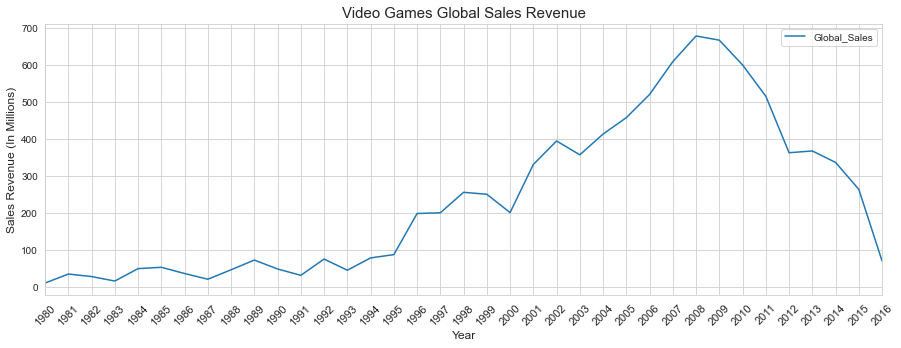

In [19]:
# Creating a dataframe grouping all the years and summing the sales values
yearly_sales = vgames_df[['Year','Global_Sales']].groupby(['Year']).sum()

# Plot 
yearly_sales.plot(figsize=(15,5))

plt.xticks(yearly_sales.index, rotation=45, fontsize=11)

plt.xlim(yearly_sales.index.min(), yearly_sales.index.max())

plt.xlabel('Year', fontsize=12)

plt.ylabel('Sales Revenue (In Millions)', fontsize=12)

plt.title('Video Games Global Sales Revenue', fontsize=15)

### What platform sold the most games?

Text(0.5, 1.0, 'Platforms Sales Revenue')

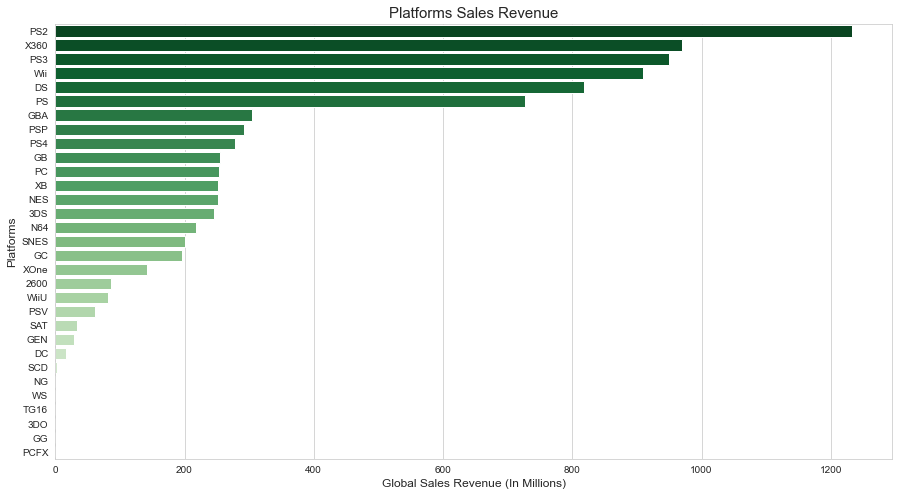

In [20]:
# Creating a dataframes containing the data I need
platform_sales = vgames_df[['Platform','Global_Sales']].groupby(['Platform']).sum()

platform_sales.sort_values('Global_Sales', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(15,8))

sns.barplot(x=platform_sales['Global_Sales'], y=platform_sales.index,
           palette="Greens_r" )

plt.xlabel('Global Sales Revenue (In Millions)', fontsize=12)

plt.ylabel('Platforms', fontsize=12)

plt.title('Platforms Sales Revenue', fontsize=15)

### Which of the big console manufacturers (Sony, Microsoft & Nintendo) earned the most in each region?

Text(0.5, 1.0, 'Manufacturers Sales Revenue By Regions')

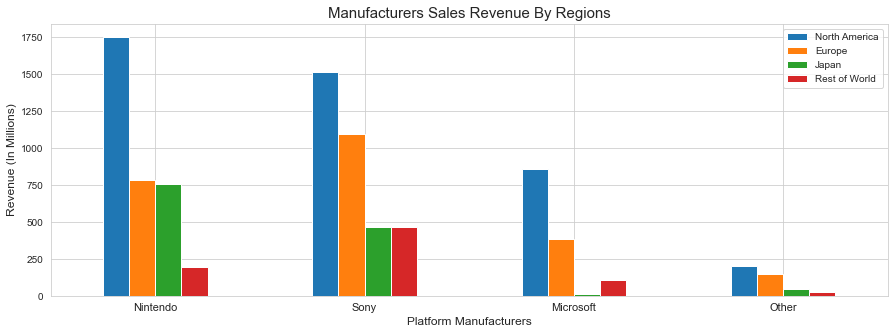

In [21]:
# Setting up a new dataframe and sorting it
sales_cols = ['Platform_Manufacturer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

big3_sales = vgames_df[sales_cols].groupby(['Platform_Manufacturer']).sum()

big3_sales.columns = ['North America', 'Europe', 'Japan', 'Rest of World']

big3_sales.sort_values(['North America', 'Europe', 'Japan', 'Rest of World'], ascending=False, inplace=True)


# Plot
big3_sales.plot(kind='bar', figsize=(15,5))

plt.xlabel('Platform Manufacturers', fontsize=12)

plt.xticks(fontsize=11, rotation=0)

plt.ylabel('Revenue (In Millions)', fontsize=12)

plt.title('Manufacturers Sales Revenue By Regions', fontsize=15)

#### More Visualizations for this dataset (Tableau Public) - https://public.tableau.com/views/VideoGamesIndustry_16638744295450/IndustryDashboard?:language=en-US&:display_count=n&:origin=viz_share_link